In [4]:

import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import cv2

In [5]:
path = r"C:/Users/Juan Bautista/.vscode/PSIB/Texturas/drive-download-20241009T222141Z-001"

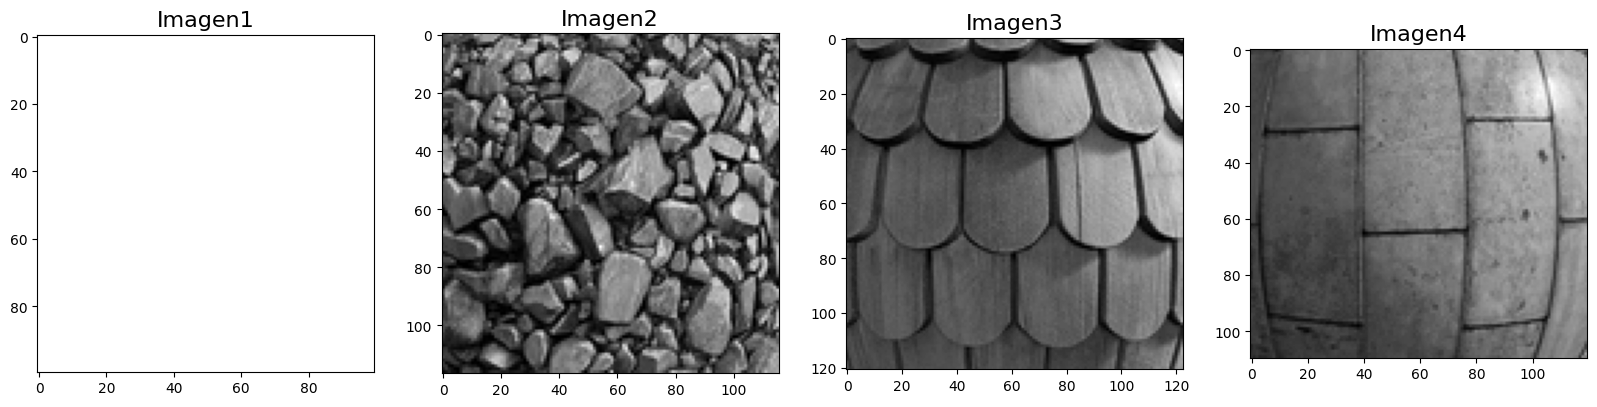

In [6]:
imagen1 = np.ones((100,100))*255
imagen2 = cv2.imread(f'{path}/img17.png', 0)
imagen3 = cv2.imread(f'{path}/img18.png', 0)
imagen4 = cv2.imread(f'{path}/img19.png', 0)

plt.figure(figsize=(20,20))
plt.subplot(141),plt.imshow(imagen1,cmap='gray',vmin=0,vmax=255),plt.title('Imagen1',fontsize=16)
plt.subplot(142),plt.imshow(imagen2,cmap='gray'),plt.title('Imagen2',fontsize=16)
plt.subplot(143),plt.imshow(imagen3,cmap='gray'), plt.title('Imagen3',fontsize=16)
plt.subplot(144),plt.imshow(imagen4,cmap='gray'), plt.title('Imagen4',fontsize=16)
plt.show()

## Matriz de co-ocurrencia

Vamos a calcular segun las direcciones (0,45,90,135). La idea es que le pasemos el parámetro como entrada.

In [8]:
#Paso 1: Creamos la matriz de co-ocurrencia que va a ser el output.
#Tiene que tener una dimensión de rango de nivel de gris (no teniendo en cuenta el 2^n si no
# el valor minimo y maximo de nivel de gris que tiene la imagen)

min_gray = np.min(img)
max_gray = np.max(img)
num_levels = max_gray - min_gray + 1  # Número de niveles de gris
img_out = np.zeros((num_levels, num_levels), dtype=int)

#Paso 2: Recorremos la imagen tomando el vecino de al lado según la dirección y
# sumamos 1 en la coordenada de img_out que le corresponde
for i in range(img.shape[0]):
    for j in range(img.shape[1] - 1):  # Evitamos el último píxel en la fila
        gray1 = img[i, j] - min_gray  # Normalizamos el valor
        gray2 = img[i, j + 1] - min_gray  # Vecino a la derecha
        img_out[gray1, gray2] += 1

#Paso 3: Nos aseguramos que sea una matriz simétrica sumando su transpuesta
img_out = img_out + img_out.T

#Paso 4: Normalizamos la matriz
sumatoria_coocurrencia = np.sum(img_out)
img_out = img_out / sumatoria_coocurrencia

C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_24712\2865331345.py:8: RuntimeWarning: overflow encountered in scalar add
  num_levels = max_gray - min_gray + 1  # Número de niveles de gris


IndexError: index 5 is out of bounds for axis 0 with size 0

Normalización

\begin{equation}
Cij = \frac{Vij}{\sum_{i,j}\nolimits Vij}
\end{equation}

## Análisis de Texturas por matriz de co-ocurrencia

El cálculo de las métricas de co-ocurrencia se basa en la matrix de co-ocurrencia de niveles de gris. La misma es calculada para cada vecindad de un pixel.

**Nomenclatura**:

$ g(i,j) $ es el elemento $(i,j)$ de la matriz de co-ocurrencia de nieveles de gris.

$ \mu = \sum_{i,j}\nolimits i \cdot g(i, j) = \sum_{i,j}\nolimits j \cdot g(i, j) $ es el promedio ponderado de los pixeles.

$ \sigma = \sum_{i,j}\nolimits (i - \mu)^2 \cdot g(i, j) = \sum_{i,j}\nolimits (j- \mu)^2 \cdot g(i, j) $ es la varianza ponderada de los píxeles.

$ \mu_t $ y $ \sigma_t $ son la media y desvio estándar de la suma de una fila (o columna, debido a la simetría).

**Métricas**:

**Energía** mide la uniformidad local. Mientras más alto es el valor, más uniforme es la textura.

\begin{equation}
f_1 = \sum_{i,j}\nolimits g(i, j)^2
\end{equation}



**Entropía** mide el nivel de organización de una textura. Si es completamente aleatoria, va a tener una muy alta entropía.

\begin{equation}
f_2 =-
  \begin{cases}
     \sum_{i,j}\nolimits g(i, j)log_2g(i,j)  & \text{if } g(i, j) \neq 0 \\
     0                                       & \text{if } g(i, j) = 0
  \end{cases}
\end{equation}

**Correlación** mide la dependencia lineal de los valores de gris en la matriz de co-ocurrencia.
\begin{equation}
f_3 = \sum_{i,j}\nolimits \frac{(i-\mu)(j-\mu)g(i, j)}{\sigma^2}
\end{equation}

**Momento de diferencia inversa** (IDM) mide homogeneidad de la imagen. Valores bajos para imágenes poco homogéneas y altos para imágenes homogeneas.
\begin{equation}
f_4 = \sum_{i,j}\nolimits \frac{1}{1+(i-j)^2}g(i, j)
\end{equation}

**Contraste** mide la variación local de niveles de gris en la matriz. Si los píxeles vecinos son muy similares, el contraste es bajo.

\begin{equation}
f_5 = \sum_{i,j}\nolimits (i-j)^2g(i, j)
\end{equation}

**Cluster Shade** se cree que mide la uniformidad percibida de la textura. Un valor alto significa que hay asimetría en la textura.
\begin{equation}
f_6 = \sum_{i,j}\nolimits ((i - \mu)+(j-\mu))^3g(i, j)
\end{equation}